In [20]:
from keras.datasets.cifar10 import load_data
(train_X, train_y), (test_X, test_y) = load_data()

print('Train', train_X.shape, train_y.shape)
print('Test', test_X.shape, test_y.shape)

Train (50000, 32, 32, 3) (50000, 1)
Test (10000, 32, 32, 3) (10000, 1)


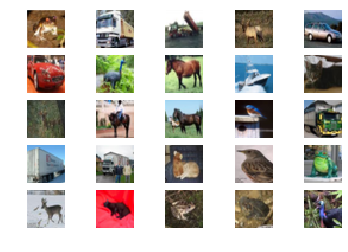

In [21]:
from keras.datasets.cifar10 import load_data
from matplotlib import pyplot

(train_X, train_y), (test_X, test_y) = load_data()

for i in range(25):
	pyplot.subplot(5, 5, 1 + i)
	pyplot.axis('off')
	pyplot.imshow(train_X[i])
pyplot.show()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
leaky_re_lu_26 (LeakyReLU)   (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 128)         147584    
_________________________________________________________________
leaky_re_lu_27 (LeakyReLU)   (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 4, 4, 256)        

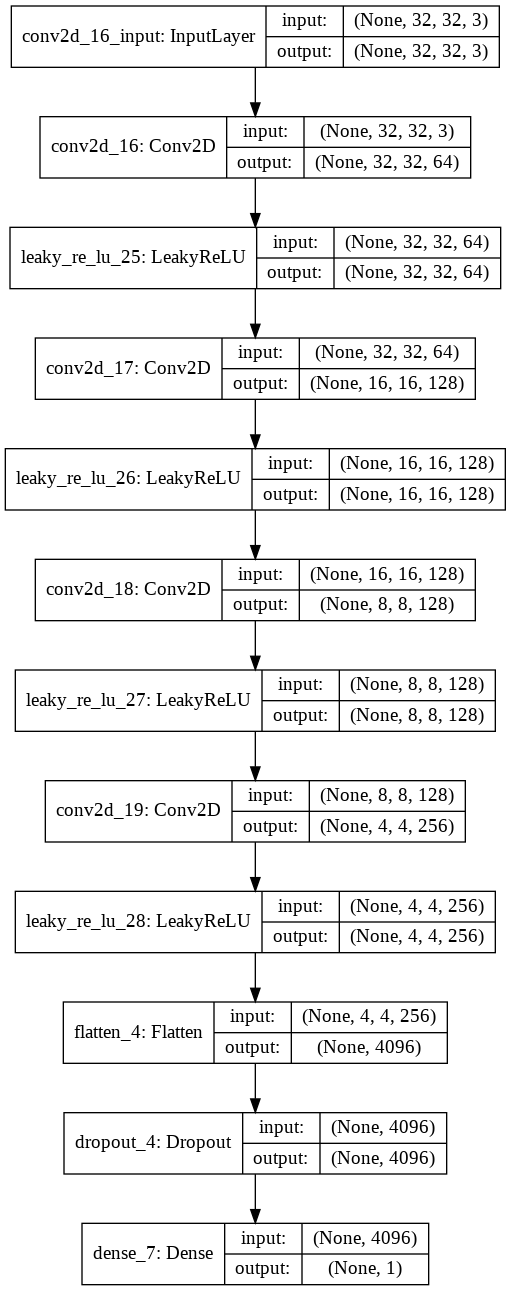

In [22]:

from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model

# define the discriminator model
def def_discriminator(in_shape=(32,32,3)):
	model = Sequential()
	
	model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	
	model.add(Conv2D(256, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	
	model.add(Flatten())
	model.add(Dropout(0.4))
	model.add(Dense(1, activation='sigmoid'))
	
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model


model = def_discriminator()

model.summary()

plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

In [0]:
(train_X, _), (_, _) = load_data()

In [0]:

X = train_X.astype('float32')
X = (X - 127.5) / 127.5

In [25]:
# example of training the discriminator model on real and random cifar10 images
from numpy import expand_dims
from numpy import ones
from numpy import zeros
from numpy.random import rand
from numpy.random import randint
from keras.datasets.cifar10 import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU

def def_discriminator(in_shape=(32,32,3)):
	model = Sequential()
	
	model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	
	model.add(Conv2D(256, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	
	model.add(Flatten())
	model.add(Dropout(0.4))
	model.add(Dense(1, activation='sigmoid'))
	
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

# load and prepare cifar10 training images
def load_realsamples():
	
	(train_X, _), (_, _) = load_data()
	
	X = train_X.astype('float32')
	
	X = (X - 127.5) / 127.5
	return X

# select real samples
def generate_realsamples(dataset, n_samples):
	
	ix = randint(0, dataset.shape[0], n_samples)
	X = dataset[ix]	
	y = ones((n_samples, 1))
	return X, y

# generate n fake samples with class labels
def generate_fakesamples(n_samples):
	
	X = rand(32 * 32 * 3 * n_samples)
	X = -1 + X * 2
	X = X.reshape((n_samples, 32, 32, 3))
	y = zeros((n_samples, 1))
	return X, y

# train the discriminator model
def train_discriminator(model, dataset, n_iter=20, n_batch=128):
	half_batch = int(n_batch / 2)

	for i in range(n_iter):
		
		X_real, y_real = generate_realsamples(dataset, half_batch)
		_, real_acc = model.train_on_batch(X_real, y_real)	
		X_fake, y_fake = generate_fakesamples(half_batch)
		_, fake_acc = model.train_on_batch(X_fake, y_fake)
		
		print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

# define the discriminator model
model = def_discriminator()
dataset = load_realsamples()
train_discriminator(model, dataset)

>1 real=91% fake=0%
>2 real=100% fake=0%
>3 real=100% fake=0%
>4 real=100% fake=16%
>5 real=100% fake=69%
>6 real=92% fake=94%
>7 real=91% fake=100%
>8 real=92% fake=100%
>9 real=95% fake=100%
>10 real=86% fake=100%
>11 real=92% fake=100%
>12 real=95% fake=100%
>13 real=97% fake=100%
>14 real=98% fake=100%
>15 real=98% fake=100%
>16 real=100% fake=100%
>17 real=100% fake=100%
>18 real=98% fake=100%
>19 real=100% fake=100%
>20 real=98% fake=100%


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 4096)              413696    
_________________________________________________________________
leaky_re_lu_33 (LeakyReLU)   (None, 4096)              0         
_________________________________________________________________
reshape_4 (Reshape)          (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_transpose_10 (Conv2DT (None, 8, 8, 128)         524416    
_________________________________________________________________
leaky_re_lu_34 (LeakyReLU)   (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_transpose_11 (Conv2DT (None, 16, 16, 128)       262272    
_________________________________________________________________
leaky_re_lu_35 (LeakyReLU)   (None, 16, 16, 128)     

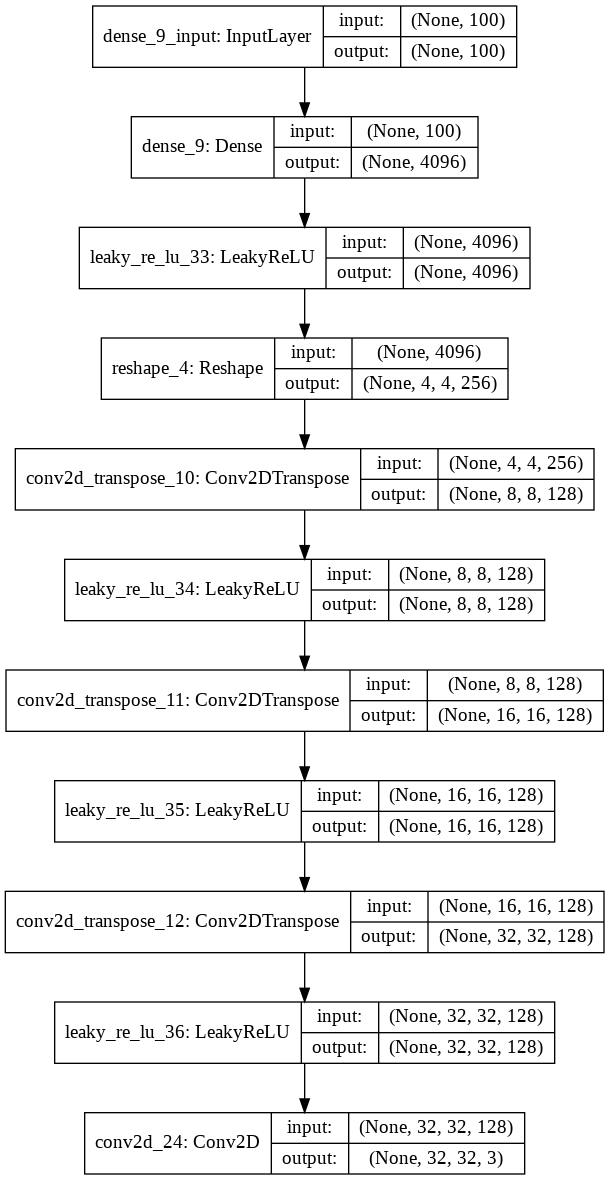

In [26]:
# example of defining the generator model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model

# define the standalone generator model
def def_generator(latent_dim):
	model = Sequential()
	
	n_nodes = 256 * 4 * 4
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((4, 4, 256)))

	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	
	model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))
	return model


latent_dim = 100
model = def_generator(latent_dim)
model.summary()
plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

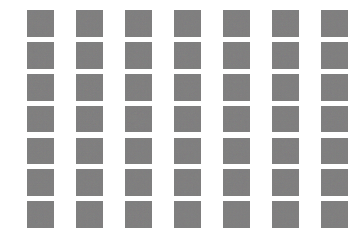

In [28]:
# example of defining and using the generator model to create samples without training
from numpy import zeros
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from matplotlib import pyplot

# define the standalone generator model
def def_generator(latent_dim):
	model = Sequential()
	
	n_nodes = 256 * 4 * 4
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((4, 4, 256)))
	
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	
	model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))
	return model

# generate points in latent space as input for the generator
def generate_latentpoints(latent_dim, n_samples):
	x_input = randn(latent_dim * n_samples)
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

# use the generator to generate n fake examples, with class labels
def generate_fakesamples(g_model, latent_dim, n_samples):
	x_input = generate_latentpoints(latent_dim, n_samples)
	X = g_model.predict(x_input)
	y = zeros((n_samples, 1))
	return X, y


latent_dim = 100
model = def_generator(latent_dim)
n_samples = 49
X, _ = generate_fakesamples(model, latent_dim, n_samples)
X = (X + 1) / 2.0

for i in range(n_samples):
	pyplot.subplot(7, 7, 1 + i)
	pyplot.axis('off')
	pyplot.imshow(X[i])
pyplot.show()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_14 (Sequential)   (None, 32, 32, 3)         1466115   
_________________________________________________________________
sequential_13 (Sequential)   (None, 1)                 522497    
Total params: 1,988,612
Trainable params: 1,466,115
Non-trainable params: 522,497
_________________________________________________________________


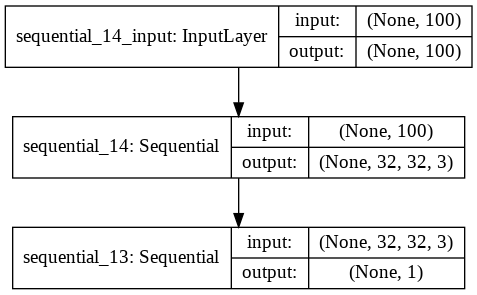

In [29]:
# demonstrate creating the three models in the gan
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.utils.vis_utils import plot_model

# define the standalone discriminator model
def def_discriminator(in_shape=(32,32,3)):
	model = Sequential()

	model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))

	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))

	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))

	model.add(Conv2D(256, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))

	model.add(Flatten())
	model.add(Dropout(0.4))
	model.add(Dense(1, activation='sigmoid'))

	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

# define the standalone generator model
def def_generator(latent_dim):
	model = Sequential()
	
	n_nodes = 256 * 4 * 4
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((4, 4, 256)))
	
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))

	model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))
	return model

# define the combined generator and discriminator model, for updating the generator
def def_gan(g_model, d_model):

	d_model.trainable = False
	model = Sequential()
	model.add(g_model)
	model.add(d_model)
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

# size of the latent space
latent_dim = 100
d_model = def_discriminator()
g_model = def_generator(latent_dim)
gan_model = def_gan(g_model, d_model)
gan_model.summary()

plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

In [0]:
# example of a dcgan on cifar10
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from keras.datasets.cifar10 import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from matplotlib import pyplot


# discriminator model
def def_discriminator(in_shape=(32,32,3)):
	model = Sequential()
	
	model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))

	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))

	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	
	model.add(Conv2D(256, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))

	model.add(Flatten())
	model.add(Dropout(0.4))
	model.add(Dense(1, activation='sigmoid'))
	
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

# generator model
def def_generator(latent_dim):
	model = Sequential()
	
	n_nodes = 256 * 4 * 4
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((4, 4, 256)))

	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))

	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))

	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))

	model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))
	return model

# combined generator and discriminator model, for updating the generator
def def_gan(g_model, d_model):
	
	d_model.trainable = False
	model = Sequential()
	model.add(g_model)
	model.add(d_model)

	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

def load_realsamples():
	(train_X, _), (_, _) = load_data()
	X = train_X.astype('float32')
	X = (X - 127.5) / 127.5
	return X

def generate_realsamples(dataset, n_samples):
	ix = randint(0, dataset.shape[0], n_samples)
	X = dataset[ix]
	y = ones((n_samples, 1))
	return X, y

def generate_latentpoints(latent_dim, n_samples):
	x_input = randn(latent_dim * n_samples)
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

def generate_fakesamples(g_model, latent_dim, n_samples):
	x_input = generate_latentpoints(latent_dim, n_samples)
	X = g_model.predict(x_input)
	y = zeros((n_samples, 1))
	return X, y

def save_plot(examples, epoch, n=7):

	examples = (examples + 1) / 2.0
	for i in range(n * n):
		pyplot.subplot(n, n, 1 + i)
		pyplot.axis('off')
		pyplot.imshow(examples[i])

	filename = 'generated_plot_1.png' #% (epoch+1)
	pyplot.savefig(filename)
	pyplot.close()

# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=150):
	
	X_real, y_real = generate_realsamples(dataset, n_samples)
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	x_fake, y_fake = generate_fakesamples(g_model, latent_dim, n_samples)
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
	save_plot(x_fake, epoch)
	filename = 'generator_model_%s.h5' % (epoch+1)
	g_model.save(filename)

# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=130, n_batch=128):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	for i in range(n_epochs):
		for j in range(bat_per_epo):
		
			X_real, y_real = generate_realsamples(dataset, half_batch)
			d_loss1, _ = d_model.train_on_batch(X_real, y_real)
			X_fake, y_fake = generate_fakesamples(g_model, latent_dim, half_batch)
			d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
			X_gan = generate_latentpoints(latent_dim, n_batch)
			y_gan = ones((n_batch, 1))
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
				(i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
		if (i+1) % 1 == 0:
			summarize_performance(i, g_model, d_model, dataset, latent_dim)
      
# scale an array of images to a new size
def scale_images(images, new_shape):
	images_list = list()
	for image in images:
		new_image = resize(image, new_shape, 0)
		images_list.append(new_image)
	return asarray(images_list)

# calculate frechet inception distance
def calculate_fid(model, images1, images2):
	
	act1 = model.predict(images1)
	act2 = model.predict(images2)

	mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
	mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
	ssdiff = numpy.sum((mu1 - mu2)**2.0)

	covmean = sqrtm(sigma1.dot(sigma2))
	
	if iscomplexobj(covmean):
		covmean = covmean.real
	
	fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
	return fid

latent_dim = 100
d_model = def_discriminator()
g_model = def_generator(latent_dim)
gan_model = def_gan(g_model, d_model)
dataset = load_realsamples()
train(g_model, d_model, gan_model, dataset, latent_dim)


import numpy
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import shuffle
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets.mnist import load_data
from skimage.transform import resize
from keras.datasets import cifar10


# prepare the inception v3 model
model = InceptionV3(include_top=False, pooling='avg', input_shape=(299,299,3))
# load cifar10 images
(images, _), (images1, _) = cifar10.load_data()
shuffle(images1)
images1 = images1[:2000]
(images2,yy) = generate_fakesamples(g_model, latent_dim, 2000)
images2 = images2[:2000]
print('Loaded', images1.shape, images2.shape)
# convert integer to floating point values
images1 = images1.astype('float32')
images2 = images2.astype('float32')
# resize images
images1 = scale_images(images1, (299,299,3))
images2 = scale_images(images2, (299,299,3))
print('Scaled', images1.shape, images2.shape)
# pre-process images
images1 = preprocess_input(images1)
images2 = preprocess_input(images2)
# calculate fid
fid = calculate_fid(model, images1, images2)
print('FID: %s' % fid)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>1, 1/390, d1=0.688, d2=0.696 g=0.691


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>1, 2/390, d1=0.625, d2=0.698 g=0.689
>1, 3/390, d1=0.563, d2=0.704 g=0.683
>1, 4/390, d1=0.479, d2=0.719 g=0.670
>1, 5/390, d1=0.370, d2=0.755 g=0.641
>1, 6/390, d1=0.252, d2=0.828 g=0.601
>1, 7/390, d1=0.170, d2=0.928 g=0.573
>1, 8/390, d1=0.147, d2=0.956 g=0.597
>1, 9/390, d1=0.157, d2=0.889 g=0.672
>1, 10/390, d1=0.153, d2=0.784 g=0.784
>1, 11/390, d1=0.183, d2=0.678 g=0.909
>1, 12/390, d1=0.159, d2=0.590 g=1.001
>1, 13/390, d1=0.264, d2=0.569 g=0.964
>1, 14/390, d1=0.180, d2=0.574 g=0.915
>1, 15/390, d1=0.286, d2=0.599 g=0.841
>1, 16/390, d1=0.146, d2=0.616 g=0.802
>1, 17/390, d1=0.184, d2=0.640 g=0.778
>1, 18/390, d1=0.086, d2=0.658 g=0.765
>1, 19/390, d1=0.128, d2=0.709 g=0.751
>1, 20/390, d1=0.149, d2=0.960 g=0.622
>1, 21/390, d1=0.202, d2=1.710 g=0.389
>1, 22/390, d1=0.153, d2=1.871 g=0.384
>1, 23/390, d1=0.213, d2=1.438 g=0.580
>1, 24/390, d1=0.371, d2=0.840 g=0.981
>1, 25/390, d1=0.566, d2=0.532 g=1.185
>1, 26/390, d1=0.538, d2=0.491 g=1.104
>1, 27/390, d1=0.416, d2=0.525 g=

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


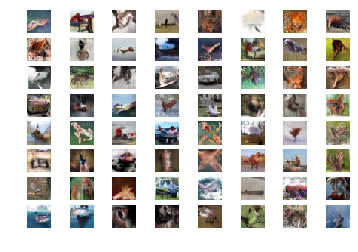

In [35]:
# example of loading the generator model and generating images
from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot

# generate points in latent space as input for the generator
def generate_latentpoints(latent_dim, n_samples):
	x_input = randn(latent_dim * n_samples)
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

# plot the generated images
def create_plot(examples, n):
	for i in range(n * n):
		pyplot.subplot(n, n, 1 + i)
		pyplot.axis('off')
		pyplot.imshow(examples[i, :, :])
	pyplot.show()
  
  # example of calculating the frechet inception distance in Keras for cifar10
import numpy
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import shuffle
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets.mnist import load_data
from skimage.transform import resize
from keras.datasets import cifar10

model = load_model('generator_model_130.h5')
latent_points = generate_latentpoints(100, 100)
X = model.predict(latent_points)
X = (X + 1) / 2.0
create_plot(X, 8)


/content


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


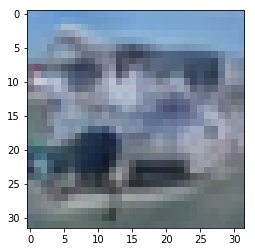

In [38]:
# example of generating an image for a specific point in the latent space
from keras.models import load_model
from numpy import asarray
from matplotlib import pyplot
import os
print(os.getcwd())

model = load_model('generator_model_130.h5')

vector = asarray([[0.75 for _ in range(100)]])

X = model.predict(vector)

X = (X + 1) / 2.0

pyplot.imshow(X[0, :, :])
pyplot.show()